In [2]:
import pandas as pd
df = pd.read_csv('content/Mall_Customers.csv')

In [3]:
import matplotlib.pyplot as plt

In [4]:
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
x = df.iloc[:,2:3]

In [5]:
y = df.iloc[:,3:4]

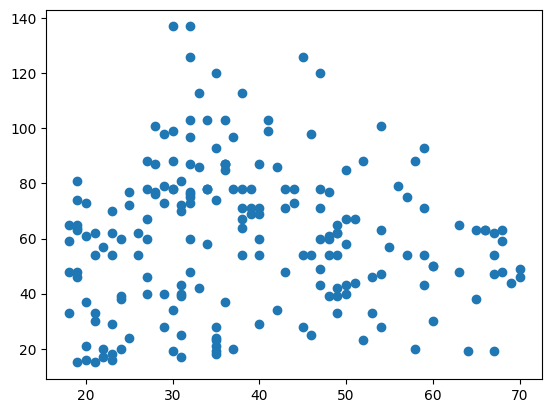

In [6]:
plt.scatter(x,y)

In [65]:
from sklearn.cluster import KMeans

In [8]:
model = KMeans(n_clusters = 3)

In [9]:
model

KMeans(n_clusters=3)

In [33]:
y_pred = model.fit_predict(df[['Age','Annual Income (k$)','Spending Score (1-100)']])

C:\Users\saksh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [70]:
y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [71]:
df['c'] = y_pred

In [36]:
df.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),c
86,87,Female,0.711538,0.344262,58,1
103,104,Male,0.153846,0.385246,55,1
43,44,Female,0.250000,0.196721,61,1
26,27,Female,0.519231,0.106557,32,1
117,118,Female,0.596154,0.409836,59,1


In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
s = MinMaxScaler()

In [56]:
s.fit(df[['Annual Income (k$)']])

MinMaxScaler()

In [57]:
df['Annual Income (k$)'] = s.transform(df[['Annual Income (k$)']])

In [58]:
s.fit(df[['Spending Score (1-100)']])


MinMaxScaler()

In [59]:
df['Age'] = s.transform(df[['Spending Score (1-100)']])

In [72]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),c
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,4
197,198,Male,32,126,74,1
198,199,Male,32,137,18,4


In [73]:
model = KMeans(n_clusters = 5)

In [74]:
y_pred = model.fit_predict(df[['Spending Score (1-100)','Annual Income (k$)']])

C:\Users\saksh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [79]:
df1 = df[df.c ==0]
df2 = df[df.c ==1]
df3 = df[df.c==2]
df4 = df[df.c==3]
df5 = df[df.c==4]

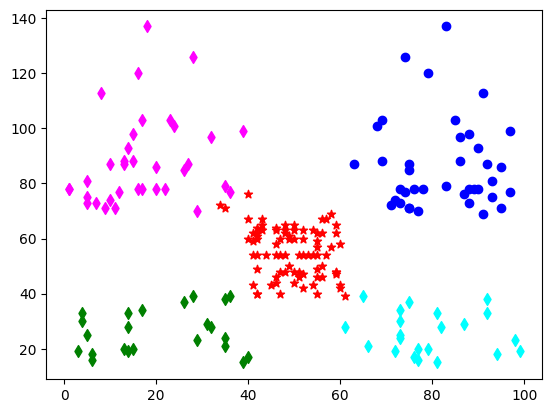

In [82]:
plt.scatter(df1['Spending Score (1-100)'],df1['Annual Income (k$)'],c = 'r',marker='*')
plt.scatter(df2['Spending Score (1-100)'],df2['Annual Income (k$)'],c = 'b',marker='o')
plt.scatter(df3['Spending Score (1-100)'],df3['Annual Income (k$)'],c = 'g',marker='d')
plt.scatter(df4['Spending Score (1-100)'],df4['Annual Income (k$)'],c = 'cyan',marker='d')
plt.scatter(df5['Spending Score (1-100)'],df5['Annual Income (k$)'],c = 'magenta',marker='d')


In [49]:
model.cluster_centers_

array([[0.15264423, 0.21016906],
       [0.72175481, 0.29943648],
       [0.33653846, 0.58435792]])